<a href="https://colab.research.google.com/github/manasik29/Decision_Tree_C5.0_CART/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree
 
Assignment


About the data:

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# **Load data and libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/content/Company_Data.csv')

In [ ]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

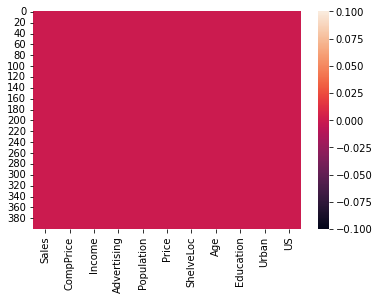

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


We can conclude no duplicate and missing values in data.

Also the data types of columns seem correct for now.

In [ ]:
data.shape

(400, 11)

# **Data Visualisation**

Continuous Columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


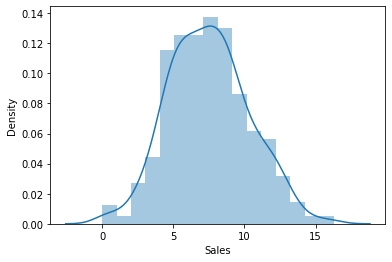

In [ ]:
sns.distplot(data.Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


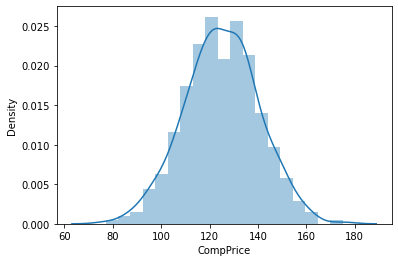

In [ ]:
sns.distplot(data.CompPrice)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


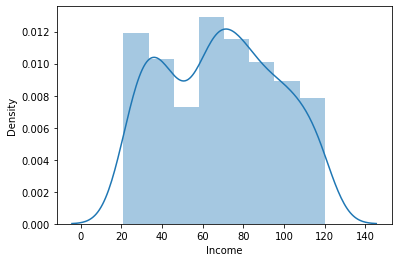

In [ ]:
sns.distplot(data.Income)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


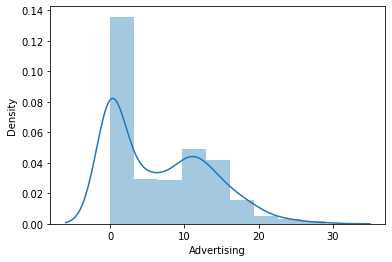

In [ ]:
sns.distplot(data.Advertising)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


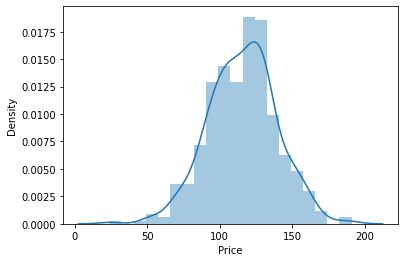

In [ ]:
sns.distplot(data.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


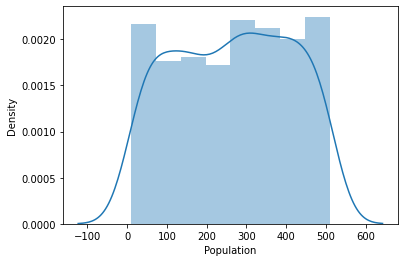

In [ ]:
sns.distplot(data.Population)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


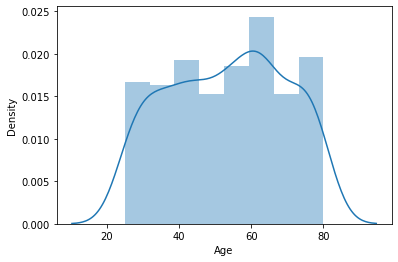

In [ ]:
sns.distplot(data.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


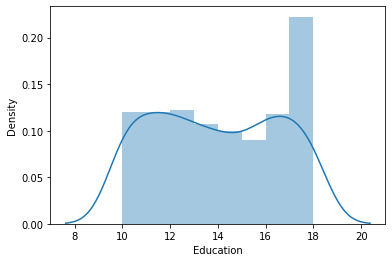

In [ ]:
sns.distplot(data.Education)

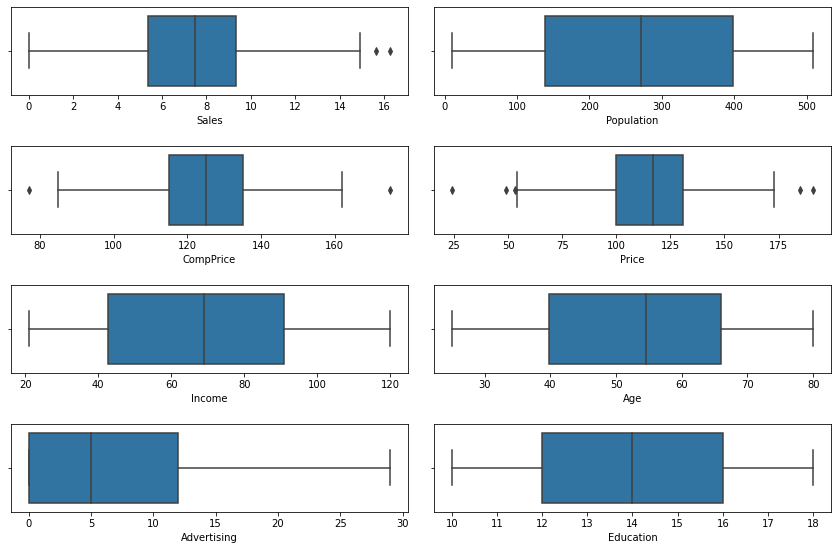

In [7]:
#Outlier Detection
fig, axes=plt.subplots(4,2,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=data,ax=axes[0,0])
sns.boxplot(x='CompPrice',data=data,ax=axes[1,0])
sns.boxplot(x='Income',data=data,ax=axes[2,0])
sns.boxplot(x='Advertising',data=data,ax=axes[3,0])
sns.boxplot(x='Population',data=data,ax=axes[0,1])
sns.boxplot(x='Price',data=data,ax=axes[1,1])
sns.boxplot(x='Age',data=data,ax=axes[2,1])
sns.boxplot(x='Education',data=data,ax=axes[3,1])
plt.tight_layout(pad=2.0)

We can see outliers in Sales, CompPrice and Price.

We will try to treat outliers using SQRT, CBRT and LOG transformation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


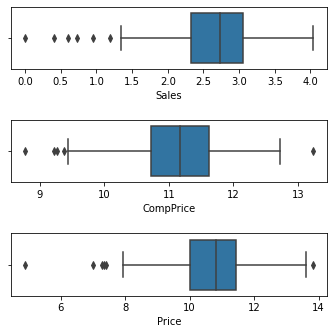

In [15]:
# Apply sqrt tansformation

fig, axes=plt.subplots(3,figsize=(5,5),sharex=False,sharey=False)
sns.boxplot(np.sqrt(data.Sales),ax=axes[0])
sns.boxplot(np.sqrt(data.CompPrice),ax=axes[1])
sns.boxplot(np.sqrt(data.Price),ax=axes[2])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


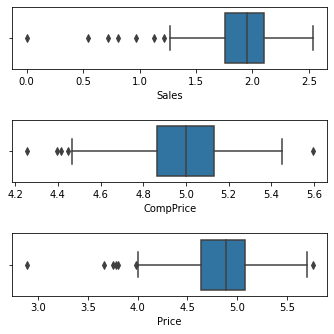

In [14]:
# Apply cbrt tansformation

fig, axes=plt.subplots(3,figsize=(5,5),sharex=False,sharey=False)
sns.boxplot(np.cbrt(data.Sales),ax=axes[0])
sns.boxplot(np.cbrt(data.CompPrice),ax=axes[1])
sns.boxplot(np.cbrt(data.Price),ax=axes[2])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be 

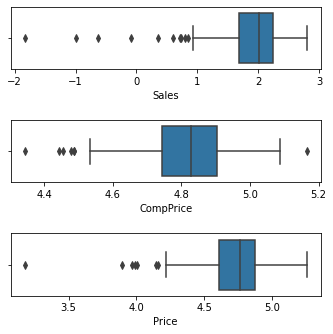

In [13]:
# Apply log tansformation

fig, axes=plt.subplots(3,figsize=(5,5),sharex=False,sharey=False)
sns.boxplot(np.log(data.Sales),ax=axes[0])
sns.boxplot(np.log(data.CompPrice),ax=axes[1])
sns.boxplot(np.log(data.Price),ax=axes[2])
plt.tight_layout(pad=2.0)

None of the transformations were that effective in eliminating outliers. 

Categorical Columns

In [16]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


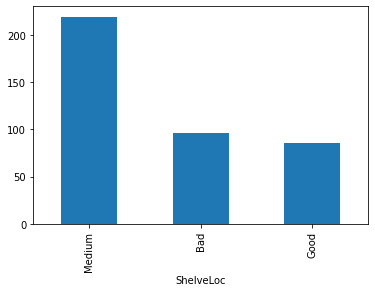

In [17]:
data['ShelveLoc'].value_counts().plot.bar()
plt.xlabel('ShelveLoc')
print(data['ShelveLoc'].value_counts())

Yes    282
No     118
Name: Urban, dtype: int64


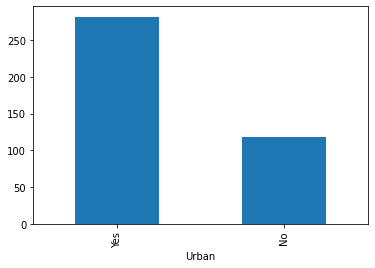

In [18]:
data['Urban'].value_counts().plot.bar()
plt.xlabel('Urban')
print(data['Urban'].value_counts())

Yes    258
No     142
Name: US, dtype: int64


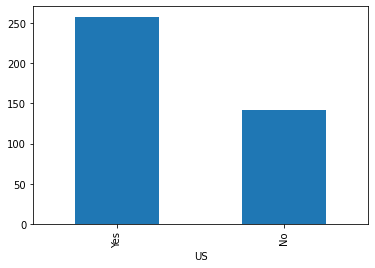

In [19]:
data['US'].value_counts().plot.bar()
plt.xlabel('US')
print(data['US'].value_counts())

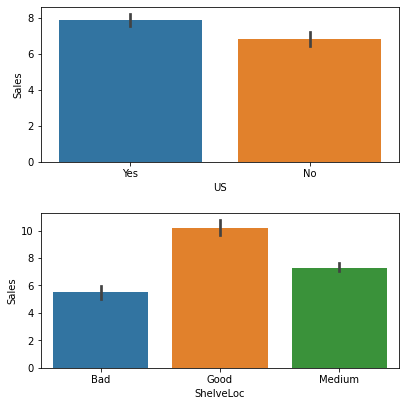

In [27]:
fig, axes=plt.subplots(2, figsize=(6,6),sharex=False,sharey=False)
sns.barplot(y= 'Sales',x ='US', data=data, ax=axes[0])
sns.barplot(y= 'Sales',x= 'ShelveLoc', data=data, ax=axes[1])
plt.tight_layout(pad=2.0)

**Observation**

- As we can conclude from above plots, Sales is highly affcted if the Shelve Location quality. If the Shelve location quality is good, sales will increase.

- Sales is also dependent on whether the store is in US or not. Sales is higher for stores in US. 

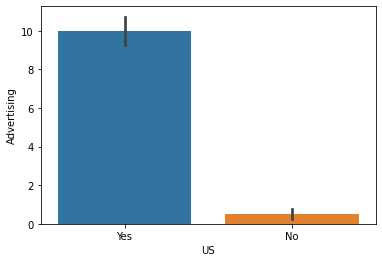

In [33]:
sns.barplot(y= 'Advertising',x ='US', data=data)

**Observation**

- The Advertising done in the US regions is very high. That means company has not done any advertising outside the US regions.

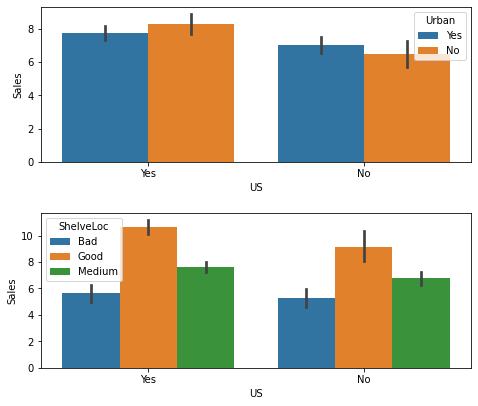

In [42]:
fig, axes=plt.subplots(2, figsize=(7,6),sharex=False,sharey=False)
sns.barplot(y= 'Sales',x ='US', hue='Urban', data=data, ax=axes[0])
sns.barplot(y= 'Sales',x= 'US', hue='ShelveLoc', data=data, ax=axes[1])
plt.tight_layout(pad=2.0)

**Observation**

- The Shelve Location quality is is higher if the region is in US and hence the Sales are also higher in the US region stores. 

- We can observe sales is lower in the region in US if it is a Urban area. 

**One Hot encoding**

We will perform one hot encoding on US, Urban and ShelveLoc features.

In [3]:
df = pd.get_dummies(data)

In [47]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


**Dependency of Sales on other features**

We can also check for dependency of Sales(target variable) on other features of data with correlation and PPS. 

In [49]:
#correlation of Sales with other features
df.corr().iloc[0,:]

Sales               1.000000
CompPrice           0.064079
Income              0.151951
Advertising         0.269507
Population          0.050471
Price              -0.444951
Age                -0.231815
Education          -0.051955
ShelveLoc_Bad      -0.393167
ShelveLoc_Good      0.500510
ShelveLoc_Medium   -0.073999
Urban_No            0.015419
Urban_Yes          -0.015419
US_No              -0.177093
US_Yes              0.177093
Name: Sales, dtype: float64

In [ ]:
#PPS
!pip install ppscore

In [4]:
import ppscore as pps

In [6]:
with pd.option_context("display.max_rows", None):
    display(pps.matrix(df))

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
5,Sales,Price,0.000000,regression,True,mean absolute error,18.720000,23.392917,DecisionTreeRegressor()
6,Sales,Age,0.000000,regression,True,mean absolute error,13.877500,18.119167,DecisionTreeRegressor()
7,Sales,Education,0.000000,regression,True,mean absolute error,2.285000,2.811667,DecisionTreeRegressor()
8,Sales,ShelveLoc_Bad,0.000000,regression,True,mean absolute error,0.240000,0.293750,DecisionTreeRegressor()
9,Sales,ShelveLoc_Good,0.000000,regression,True,mean absolute error,0.212500,0.223750,DecisionTreeRegressor()


Before we build a model for our data we will check for outliers by **Isolation Forest Technique**.

In [7]:
from sklearn.ensemble import IsolationForest

In [23]:
data2 = pd.read_csv('/content/Company_Data.csv')

In [24]:
data2=pd.get_dummies(data2)

In [11]:
#training the model
clf = IsolationForest(random_state=10, contamination=.015)
clf.fit(data2)

IsolationForest(contamination=0.015, random_state=10)

In [27]:
data2['anamoly'] = clf.predict(data2.iloc[:,0:15])

In [29]:
data2[data2['anamoly']==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anamoly
5,10.81,124,113,13,501,72,78,16,1,0,0,1,0,0,1,-1
25,14.90,139,32,0,176,82,54,11,0,1,0,1,0,1,0,-1
75,8.55,88,111,23,480,92,36,16,1,0,0,1,0,0,1,-1
159,9.32,119,60,0,372,70,30,18,1,0,0,1,0,1,0,-1
284,6.97,106,46,11,414,96,79,17,1,0,0,1,0,1,0,-1
317,6.41,142,30,0,472,136,80,15,0,1,0,1,0,1,0,-1


These datapoints are **outliers** in our data.

We can eliminate these points to improve our model. There are other methods of imputation as well, but here we will go with elimination.

In [33]:
df_final = df.drop([5,25,75,159,284,317])

In [34]:
df_final.shape

(394, 15)

6 datapoints which were **outliers** were **dropped** from our data to **improve our model**.

**Model Building**

In [43]:
#divide data into dependent and independent variables
array = df_final.values
x = array[:,1:15]
y = array[:, 0]

In [85]:
#get train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)

**Decision Tree for Regressor Model**

In [86]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [87]:
#fearture importance using Decision Tree
print(model.feature_importances_)

[1.13161493e-01 8.53038868e-02 6.35104104e-02 3.34268279e-02
 2.53555573e-01 1.09160620e-01 2.51750061e-02 6.41393296e-02
 2.42974374e-01 1.16472563e-03 1.51789871e-03 1.57412206e-03
 1.23783393e-04 5.21194985e-03]


In [88]:
df_final.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

Price, ShelveLoc_Good can be considered important features affecting our target variable - Sales.

In [89]:
pred = model.predict(x_test)

In [90]:
pred

array([ 6.54,  9.31, 11.28,  9.09,  4.95, 11.99,  6.37,  8.78,  8.78,
       13.14, 10.48,  5.35, 13.28,  8.77, 10.49,  8.67,  9.95,  8.64,
        9.  ,  8.47,  5.94,  8.19,  4.67,  6.71, 10.64,  4.56, 13.91,
       11.7 ,  9.39,  7.8 , 10.21,  7.62,  4.1 , 12.01,  8.14,  9.49,
        3.42, 13.44,  2.67, 12.85])

In [91]:
y_test

array([ 5.08,  7.53,  9.46, 12.53,  6.18, 10.26,  8.65,  7.5 ,  8.79,
       12.57, 11.91,  4.53, 12.66,  9.71,  8.77,  9.32, 11.48,  7.7 ,
       10.27,  7.3 ,  7.63,  7.49,  7.32,  9.64,  9.33,  3.24, 14.37,
        9.16,  6.44,  9.01,  6.64,  5.07,  5.83,  9.14, 11.18, 10.36,
        4.9 , 12.57,  4.68, 11.85])

In [92]:
#find accuracy
model.score(x_test, y_test)

0.5172153607717256

As the data we had was small so we selected the test data also a small quantity, to increase model accuracy. 